<h1 align="center"> Weather (Predict , Is Rain Tomorrow )</h1>

# Intoduction

The objective of this project is to predict is Rain Tomorrow or not.

# Weather Data

Wheater Dataset contains 21 features including temperatures of the weather and Rainfall, Evaporation, Sunshine, WindSpeed, Humidity,Pressure in the air,Todays rain information.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
WData=pd.read_csv('weather.csv')


In [4]:
WData.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am     ...       \
0           30.0         SW         NW           6.0     ...        
1           39.0          E          W           4.0     ...        
2           85.0          N        NNE           6.0     ...        
3           54.0        WNW          W          30.0     ...        
4           50.0        SSE        ESE          20.0     ...        

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0           29       1019.7       1015.0         7         7     14.4   
1           36       1012.4       1008.4         5         3     17.5   
2           69       1009.5       1007.2         8         7     15.4   
3           56       1005.5       1007.0         2         7     13.5   
4           49       1018.3       1018.5         7         7     11.1   

   Temp3pm  RainToday  RISK_MM RainTomorrow  
0     23.6         No      3.6          Yes  
1     25.7        Yes      3.6          Yes  
2     20.2        Yes     39.8          Yes  
3     14.1        Yes      2.8          Yes  
4     15.4        Yes      0.0           No  

[5 rows x 22 columns]

# Explore the data

In [5]:
WData.describe()

MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.000000    13.000000   
25%        31.000000      6.000000     11.000000    64.000000    32.250000   
50%        39.000000      7.000000     17.000000    72.000000    43.000000   
75%        46.000000     13.000000     24.000000    81.000000    55.000000   
max        98.000000     41.000000     52.000000    99.000000    96.000000   

       Pressure9am  Pressure3pm    Cloud9am    Cloud3pm     Temp9am  \
count   366.000000   366.000000  366.000000  366.000000  366.000000   
mean   1019.709016  1016.810383    3.890710    4.024590   12.358470   
std       6.686212     6.469422    2.956131    2.666268    5.630832   
min     996.500000   996.800000    0.000000    0.000000    0.100000   
25%    1015.350000  1012.800000    1.000000    1.000000    7.625000   
50%    1020.150000  1017.400000    3.500000    4.000000   12.550000   
75%    1024.475000  1021.475000    7.000000    7.000000   17.000000   
max    1035.700000  1033.200000    8.000000    8.000000   24.700000   

          Temp3pm     RISK_MM  
count  366.000000  366.000000  
mean    19.230874    1.428415  
std      6.640346    4.225800  
min      5.100000    0.000000  
25%     14.150000    0.000000  
50%     18.550000    0.000000  
75%     24.000000    0.200000  
max     34.500000   39.800000

In [6]:
WData.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

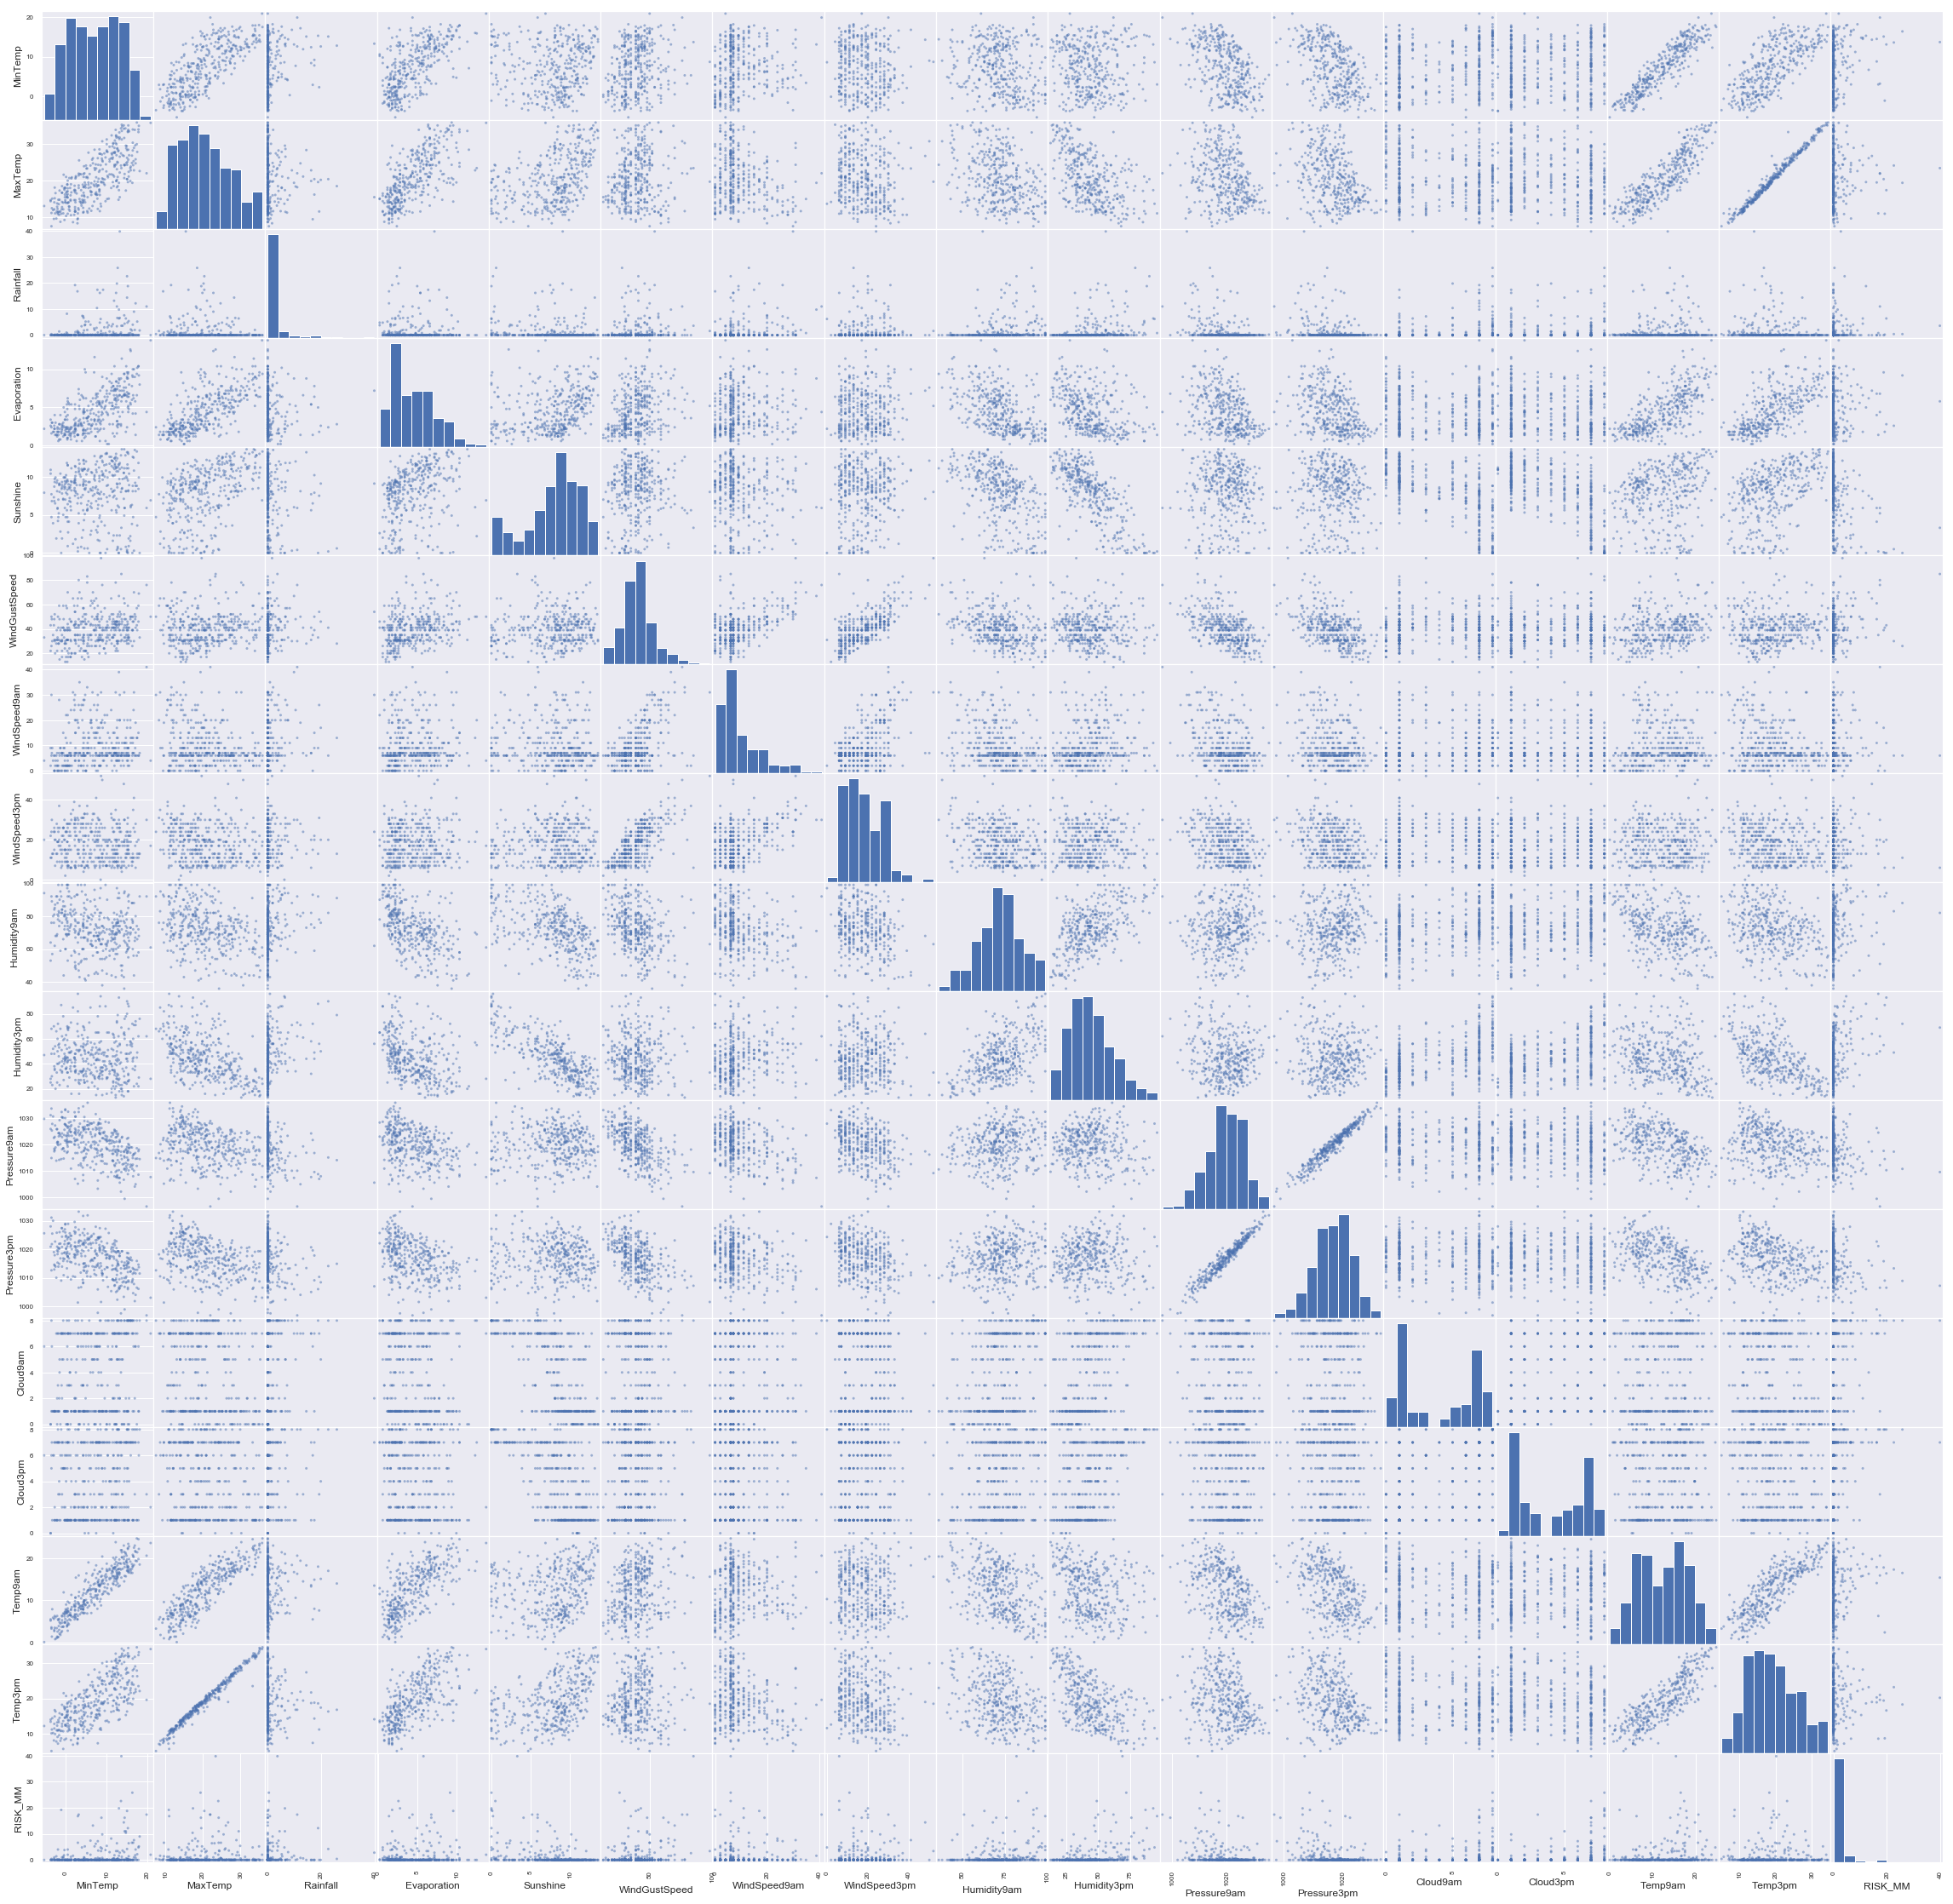

In [7]:
Features=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']
pair_plot = pd.plotting.scatter_matrix(WData[Features] , figsize=(40,40))

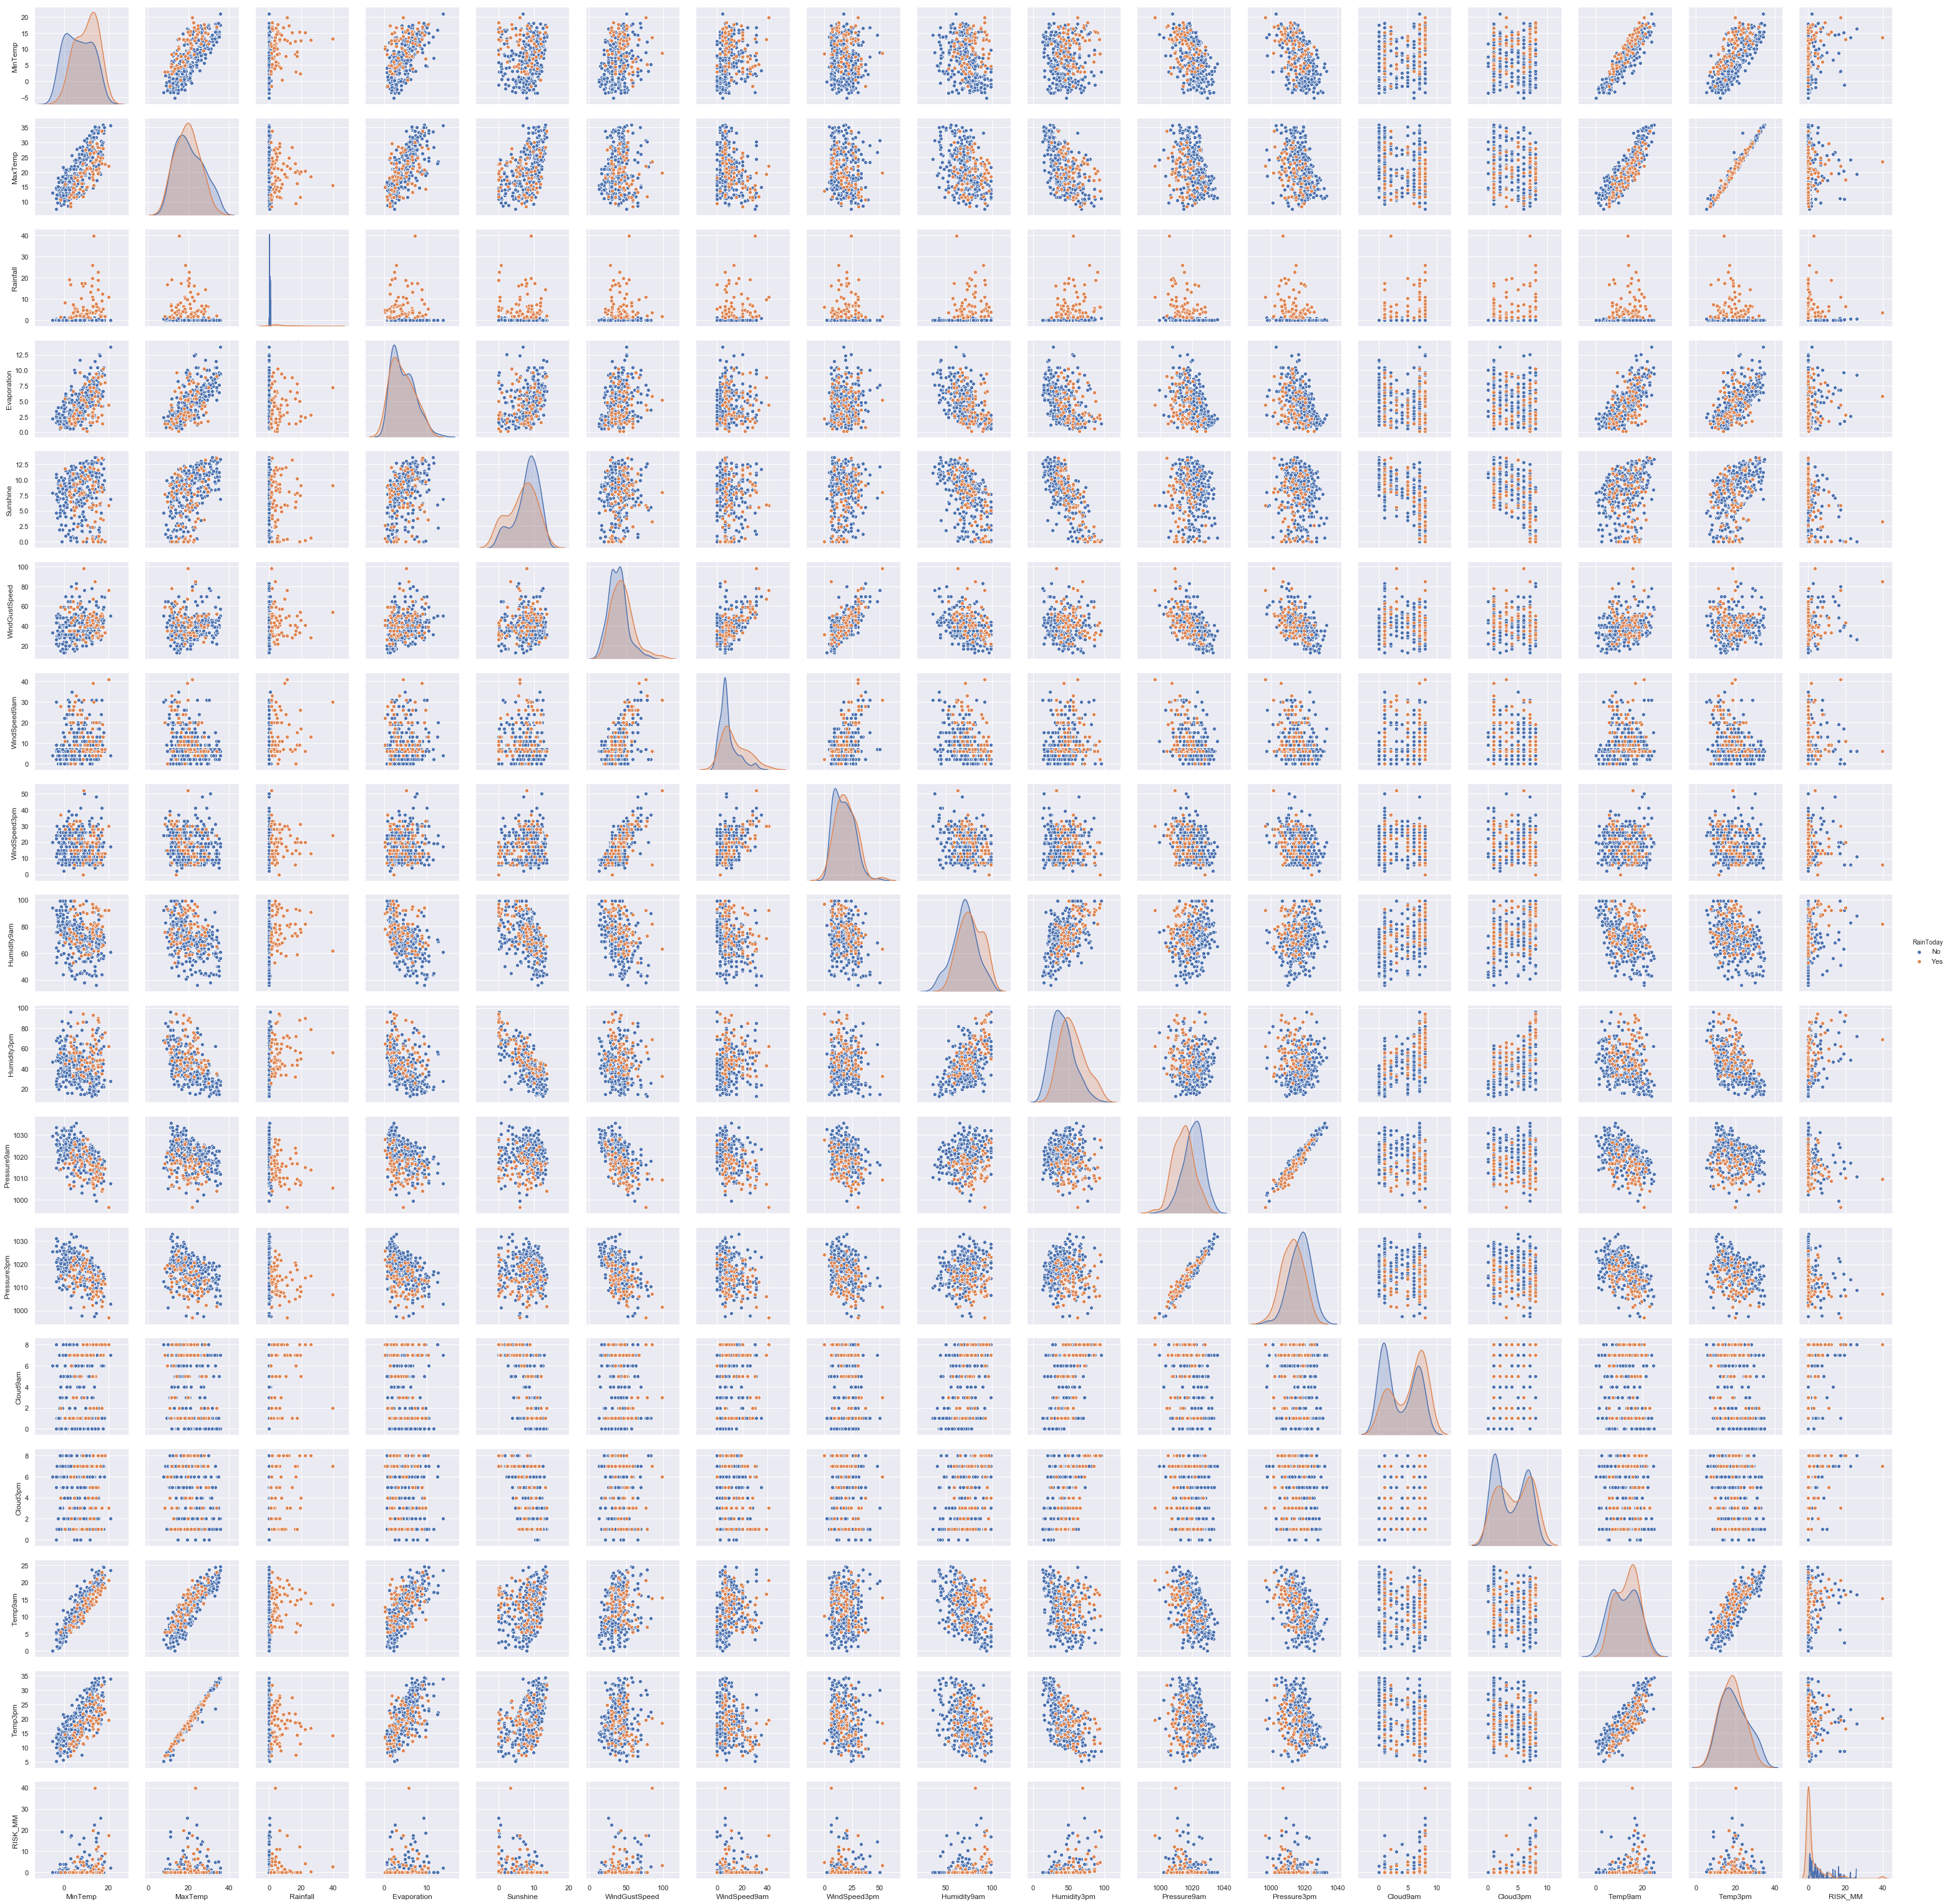

In [8]:
pair_plot = sns.pairplot(WData[Features], hue='RainToday')

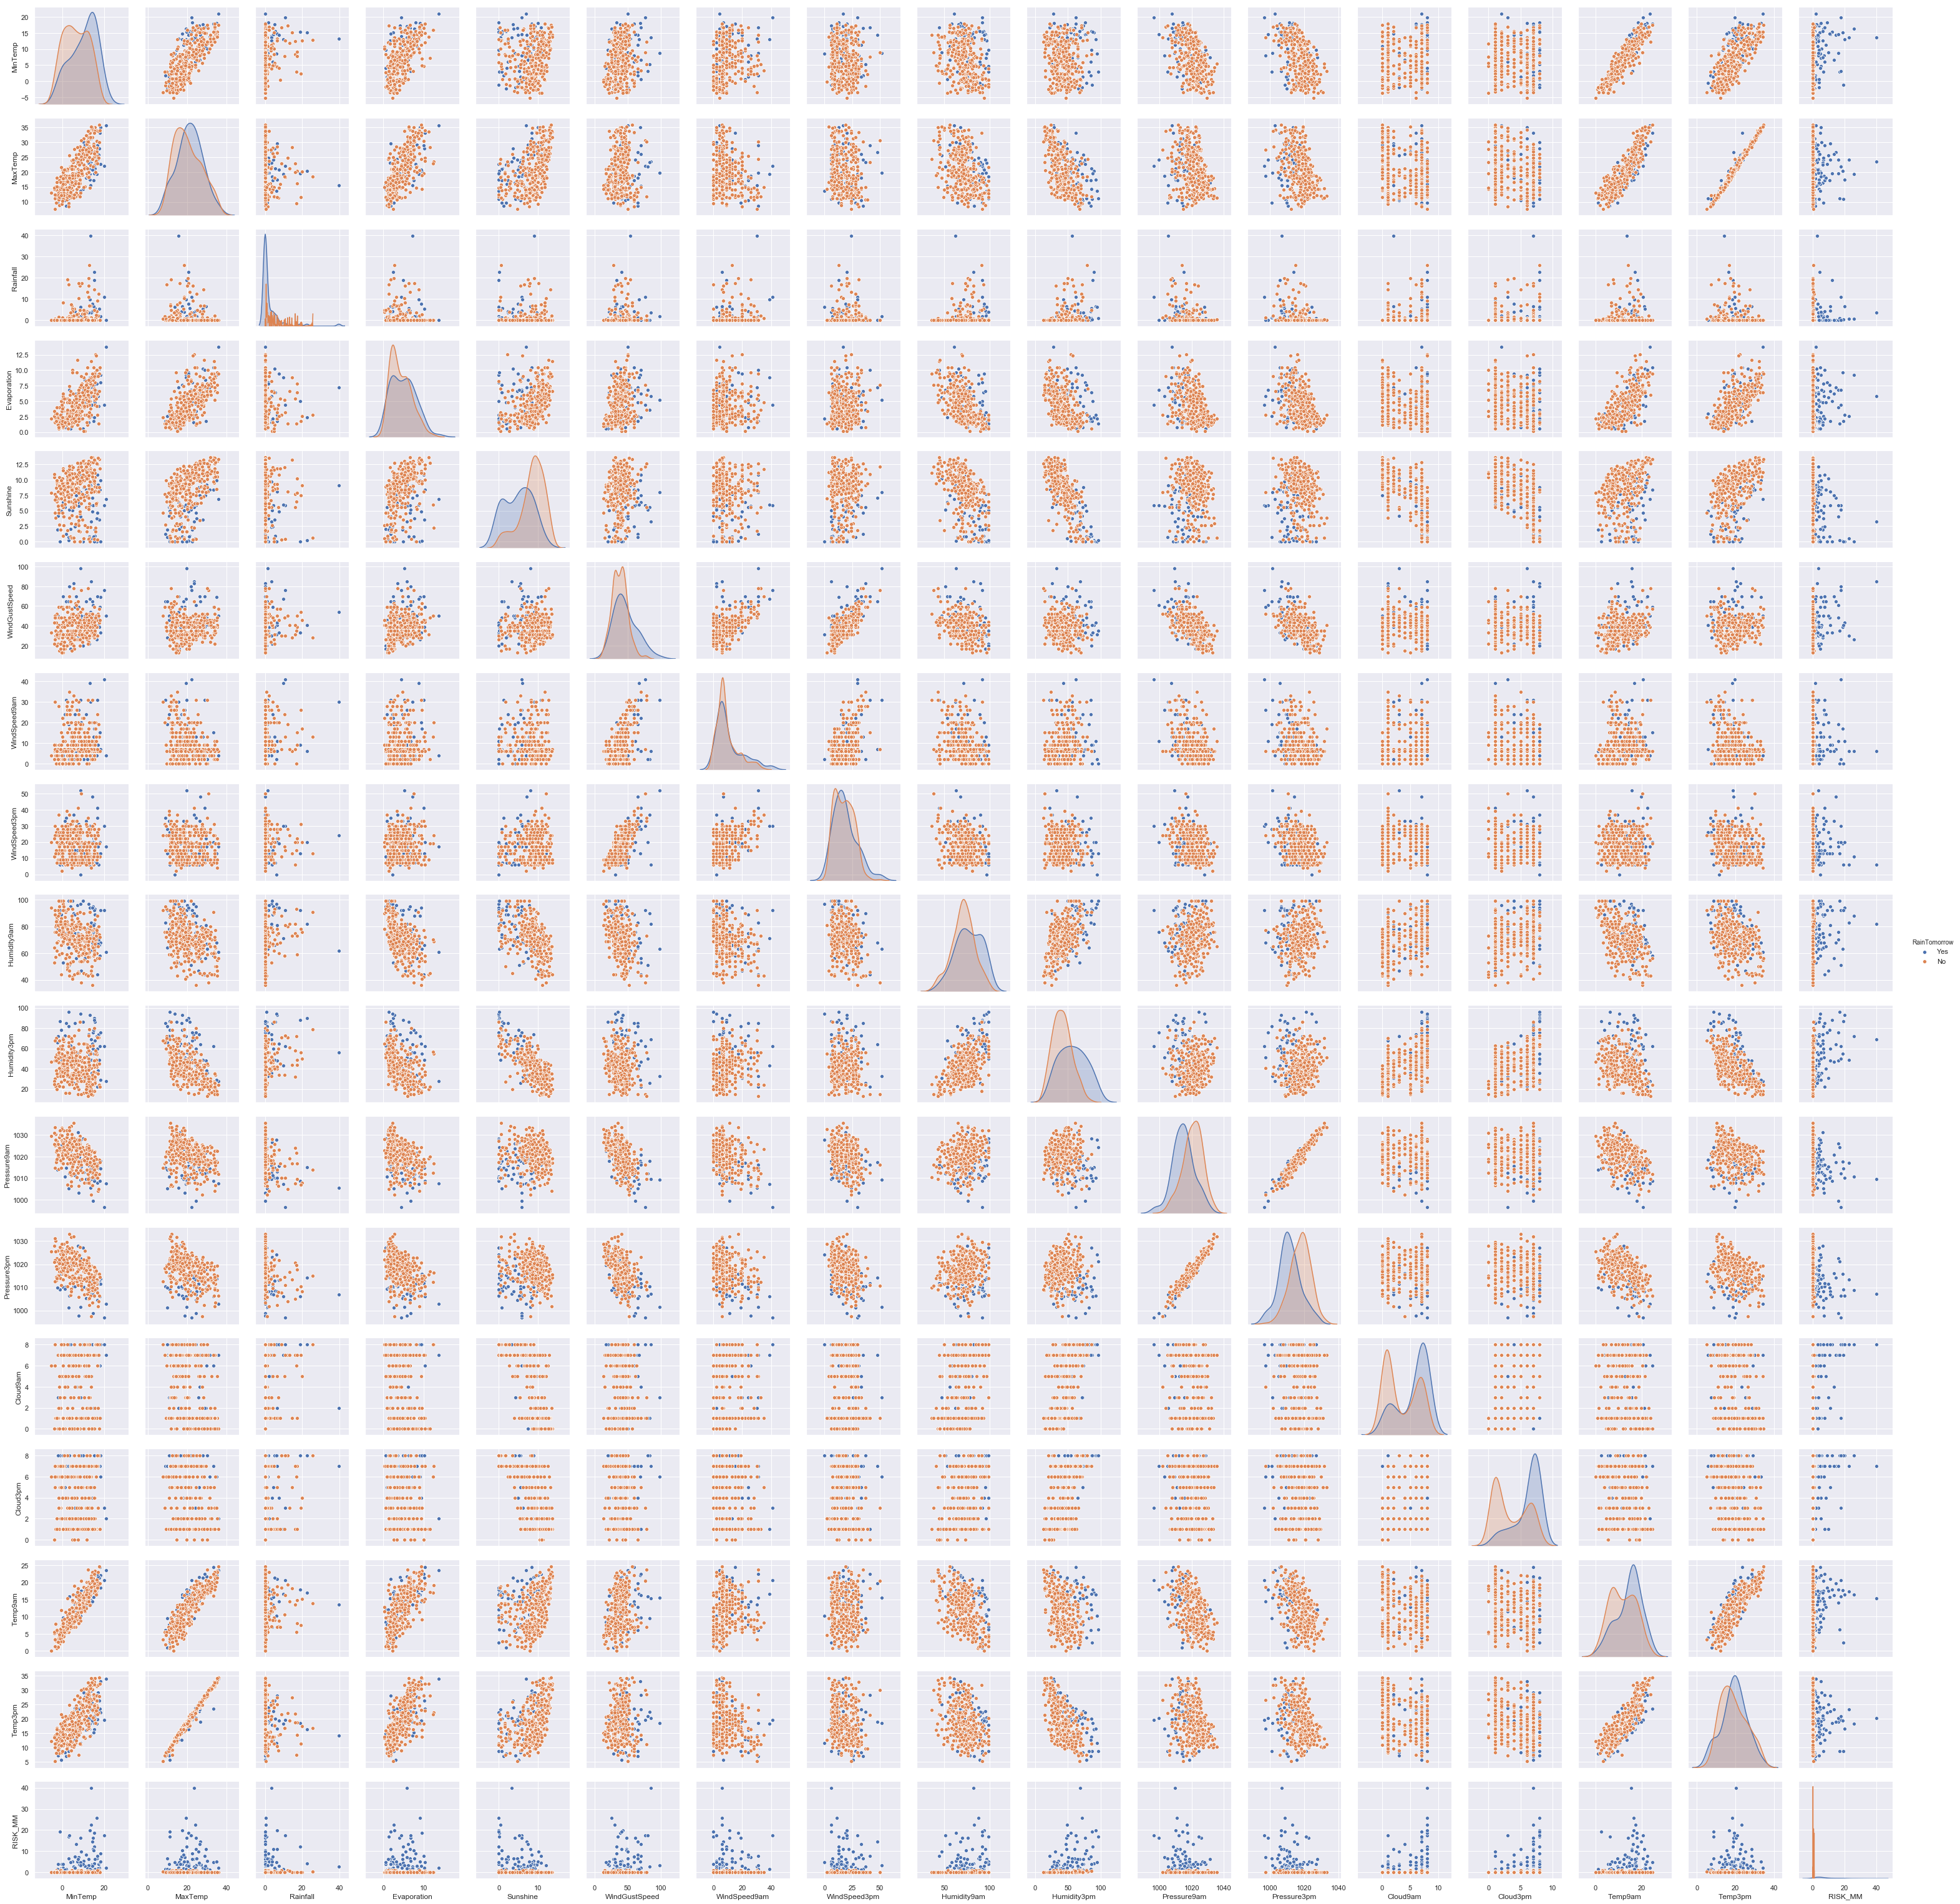

In [9]:
pair_plot = sns.pairplot(WData[Features], hue='RainTomorrow')

In [10]:
wd=pd.DataFrame(np.random.randn(22,22), columns=WData.columns)

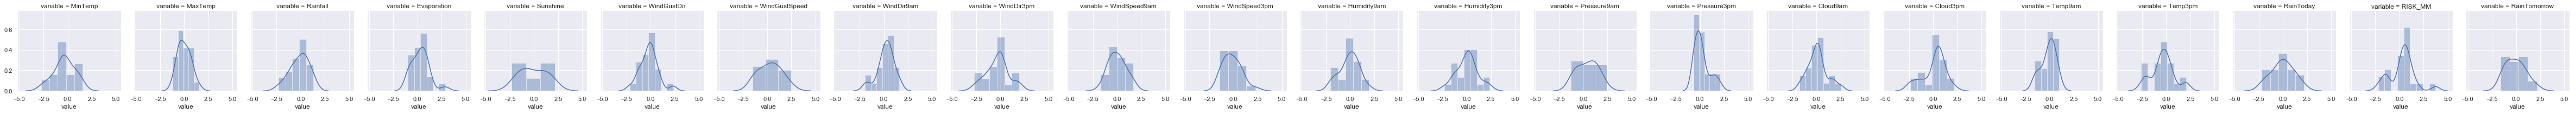

In [11]:
g = sns.FacetGrid(wd.melt(), col="variable")
g.map(sns.distplot, "value")

plt.show()

# Clean and Transform the Data

In [12]:
WData.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am     ...       \
0           30.0         SW         NW           6.0     ...        
1           39.0          E          W           4.0     ...        
2           85.0          N        NNE           6.0     ...        
3           54.0        WNW          W          30.0     ...        
4           50.0        SSE        ESE          20.0     ...        

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0           29       1019.7       1015.0         7         7     14.4   
1           36       1012.4       1008.4         5         3     17.5   
2           69       1009.5       1007.2         8         7     15.4   
3           56       1005.5       1007.0         2         7     13.5   
4           49       1018.3       1018.5         7         7     11.1   

   Temp3pm  RainToday  RISK_MM RainTomorrow  
0     23.6         No      3.6          Yes  
1     25.7        Yes      3.6          Yes  
2     20.2        Yes     39.8          Yes  
3     14.1        Yes      2.8          Yes  
4     15.4        Yes      0.0           No  

[5 rows x 22 columns]

In [13]:
WData['RainToday']=WData['RainToday'].map({'No':0, 'Yes':1}) #Converting Raintoday values to 0 and 1, since Model accept values
WData['RainTomorrow']=WData['RainTomorrow'].map({'No':0, 'Yes':1})#Converting Raintoday values to 0 and 1, since Model accept values

In [14]:
WData.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am      ...       \
0           30.0         SW         NW           6.0      ...        
1           39.0          E          W           4.0      ...        
2           85.0          N        NNE           6.0      ...        
3           54.0        WNW          W          30.0      ...        
4           50.0        SSE        ESE          20.0      ...        

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0           29       1019.7       1015.0         7         7     14.4   
1           36       1012.4       1008.4         5         3     17.5   
2           69       1009.5       1007.2         8         7     15.4   
3           56       1005.5       1007.0         2         7     13.5   
4           49       1018.3       1018.5         7         7     11.1   

   Temp3pm  RainToday  RISK_MM  RainTomorrow  
0     23.6          0      3.6             1  
1     25.7          1      3.6             1  
2     20.2          1     39.8             1  
3     14.1          1      2.8             1  
4     15.4          1      0.0             0  

[5 rows x 22 columns]

In [15]:
WData=WData.drop({'WindDir9am','WindDir3pm','WindGustDir'},axis=1)

In [16]:
WData.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      8.0     24.3       0.0          3.4       6.3           30.0   
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           6.0            20           68           29       1019.7   
1           4.0            17           80           36       1012.4   
2           6.0             6           82           69       1009.5   
3          30.0            24           62           56       1005.5   
4          20.0            28           68           49       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1015.0         7         7     14.4     23.6          0      3.6   
1       1008.4         5         3     17.5     25.7          1      3.6   
2       1007.2         8         7     15.4     20.2          1     39.8   
3       1007.0         2         7     13.5     14.1          1      2.8   
4       1018.5         7         7     11.1     15.4          1      0.0   

   RainTomorrow  
0             1  
1             1  
2             1  
3             1  
4             0

In [17]:
WData['WindGustSpeed']=WData['WindGustSpeed'].replace(np.nan,WData['WindGustSpeed'].mean())

In [18]:
WData.fillna(WData.mean(), inplace=True)    #Replace nan values with mean of the feature

In [19]:
WData.describe()

MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  366.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.467180   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    6.000000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     366.000000    366.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.023978      7.875308      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.000000    13.000000   
25%        31.000000      6.000000     11.000000    64.000000    32.250000   
50%        39.000000      7.000000     17.000000    72.000000    43.000000   
75%        46.000000     13.000000     24.000000    81.000000    55.000000   
max        98.000000     41.000000     52.000000    99.000000    96.000000   

       Pressure9am  Pressure3pm    Cloud9am    Cloud3pm     Temp9am  \
count   366.000000   366.000000  366.000000  366.000000  366.000000   
mean   1019.709016  1016.810383    3.890710    4.024590   12.358470   
std       6.686212     6.469422    2.956131    2.666268    5.630832   
min     996.500000   996.800000    0.000000    0.000000    0.100000   
25%    1015.350000  1012.800000    1.000000    1.000000    7.625000   
50%    1020.150000  1017.400000    3.500000    4.000000   12.550000   
75%    1024.475000  1021.475000    7.000000    7.000000   17.000000   
max    1035.700000  1033.200000    8.000000    8.000000   24.700000   

          Temp3pm   RainToday     RISK_MM  RainTomorrow  
count  366.000000  366.000000  366.000000    366.000000  
mean    19.230874    0.180328    1.428415      0.180328  
std      6.640346    0.384987    4.225800      0.384987  
min      5.100000    0.000000    0.000000      0.000000  
25%     14.150000    0.000000    0.000000      0.000000  
50%     18.550000    0.000000    0.000000      0.000000  
75%     24.000000    0.000000    0.200000      0.000000  
max     34.500000    1.000000   39.800000      1.000000

In [22]:
WData.fillna(WData.mean(), inplace=True)

In [24]:
WData["RainTomorrow"].value_counts()

0    300
1     66
Name: RainTomorrow, dtype: int64

# Archive Clean Data(If desire)

In [25]:
WData=pd.DataFrame(WData)

In [26]:
WData.to_csv("New_Weather.csv")

### Place the features and target variable in X and y, respectively

In [27]:
X = WData.iloc[:, :-1].values
y=WData.iloc[:,-1].values
X,y

(array([[ 8. , 24.3,  0. , ..., 23.6,  0. ,  3.6],
        [14. , 26.9,  3.6, ..., 25.7,  1. ,  3.6],
        [13.7, 23.4,  3.6, ..., 20.2,  1. , 39.8],
        ...,
        [12.5, 19.9,  0. , ..., 18.3,  0. ,  0. ],
        [12.5, 26.9,  0. , ..., 25.9,  0. ,  0. ],
        [12.3, 30.2,  0. , ..., 28.6,  0. ,  0. ]]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0,

In [28]:
X.shape

(366, 18)

In [29]:
y.shape

(366,)

# Split and Standardize the Data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)


In [31]:
X_train.shape,X_test.shape

((256, 18), (110, 18))

In [32]:
y_train.shape,y_test.shape

((256,), (110,))

In [33]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]

array([[ 1.30592548,  1.95852629, -0.35334566,  1.87219694,  1.58045024,
         0.31387701, -0.72299512,  0.65721973, -0.94451154, -1.58977756,
        -0.78341891, -0.65038116, -1.40910064, -1.18597671,  1.81570211,
         2.01541126, -0.498779  , -0.35963378],
       [ 0.45689834, -0.83785937,  0.70772752, -1.58669719, -1.97162107,
         0.46008422,  1.60090603, -0.11658957,  1.32090028,  1.10433563,
         0.49228762,  0.80999706,  0.95744889,  1.03827265,  0.08666513,
        -0.83682802,  2.00489597, -0.31520026],
       [-0.45871917, -0.14644533, -0.35334566,  2.09777699,  0.9651308 ,
         0.46008422,  0.43895545,  1.6521174 , -2.30375863, -1.18852666,
        -0.10304209, -0.20214626, -1.07102214, -1.55668493,  0.37787136,
        -0.1237682 , -0.498779  , -0.35963378],
       [-1.39098427, -0.57665851, -0.35334566, -0.75957033,  0.48965669,
        -0.7095735 , -0.98120636, -0.33767794,  0.26370809, -0.21406019,
         0.46393859,  0.28946621,  0.28129188, -0.815

In [34]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train_std,y_train)
ln.score(X_test_std,y_test)

0.45452199730142856

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = .1)
log_reg.fit(X_train_std,y_train)

log_reg.score(X_test_std,y_test) 



0.9454545454545454

In [36]:
log_reg.score(X_train,y_train)

0.7890625

In [37]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=.1)
svm.fit(X_train_std,y_train)
svm.score(X_test_std,y_test) 


0.9818181818181818

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std,y_train)
knn.score(X_test_std,y_test) 

0.9272727272727272

In [39]:
knn.score(X_train_std,y_train) 

0.8984375

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train_std,y_train)
rf.score(X_test_std,y_test)

1.0

In [41]:
rf.score(X_train,y_train)

0.2109375

In [42]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train_std,y_train)
nn.score(X_test_std,y_test)

0.9636363636363636

### Feature Selection and Feature Engineering

**Random Forest Classifier** can identify the importance of each feature

In [43]:
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_

In [44]:
# feature_importance array needs to be reshaped; it is a vector of shape (8,), it needs to be shaped (1,8)
best_features = pd.DataFrame(feature_importance.reshape(1,-1), columns=WData.columns[:-1], index = ["importance"])
best_features

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
importance  0.020582  0.013561  0.008223     0.011937   0.04655   

            WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
importance       0.035949      0.010912      0.017089      0.03049   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
importance      0.05219     0.042096     0.078513  0.013625  0.032843   

             Temp9am   Temp3pm  RainToday   RISK_MM  
importance  0.014882  0.017667    0.00237  0.550522

### Cross Validation (for model selection)

In [45]:
from sklearn.model_selection import cross_val_score

classifiers = [log_reg, knn, svm, rf, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

In [46]:
models_WData = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["LR", "KNN", "SVM", "Forest", "Neural Network"])
models_WData["Mean"] = models_WData.mean(axis=1)
models_WData

1         2         3         4     5     6     7  \
LR              0.888889  0.925926  0.923077  0.961538  0.92  0.92  0.92   
KNN             0.888889  0.888889  0.807692  0.846154  0.96  0.84  0.84   
SVM             0.888889  0.925926  1.000000  0.961538  0.96  0.96  0.96   
Forest          0.962963  1.000000  1.000000  1.000000  1.00  1.00  0.96   
Neural Network  0.888889  0.925926  0.961538  0.923077  0.92  0.92  0.92   

                   8     9    10      Mean  
LR              0.92  0.96  0.92  0.925943  
KNN             0.88  0.80  0.92  0.867162  
SVM             0.92  1.00  0.92  0.949635  
Forest          1.00  1.00  1.00  0.992296  
Neural Network  0.92  0.88  0.96  0.921943

### Box Plot (for model selection)

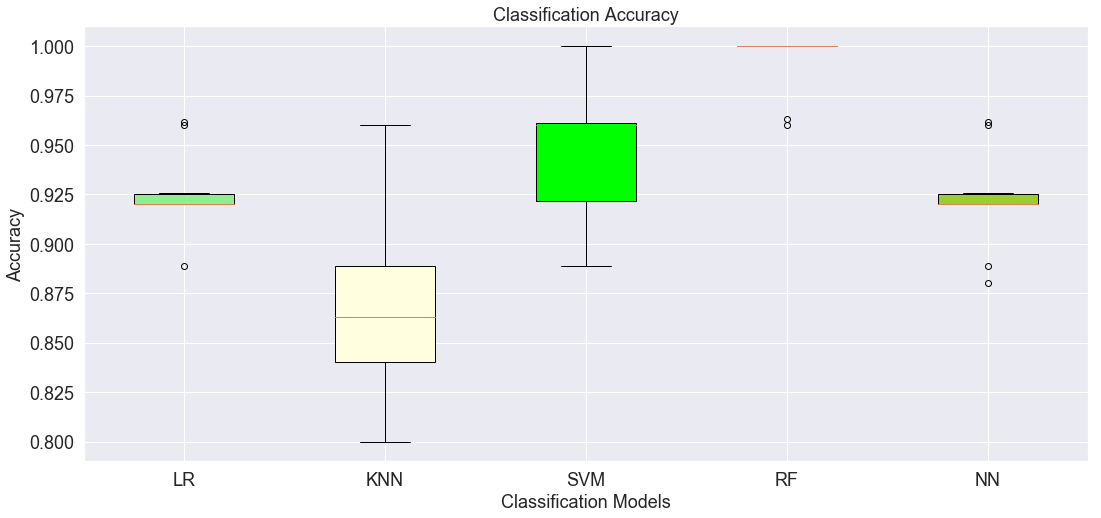

In [48]:
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)

axes.set_title('Classification Accuracy', fontsize = 18)


# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF', 'NN'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)


### Compare the accuracy of the Training set versus the Test set using different models

In [49]:
log_reg = LogisticRegression(C = .1)
log_reg.fit(X_train_std, y_train)
train_score = log_reg.score(X_train_std, y_train)
test_score = log_reg.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.94140625 
Test score: 0.9454545454545454


In [50]:
svm = SVC(kernel='linear', C=.1)
svm.fit(X_train_std, y_train)
train_score = svm.score(X_train_std, y_train)
test_score = svm.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9609375 
Test score: 0.9818181818181818


In [51]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train_std, y_train)
train_score = rf.score(X_train_std, y_train)
test_score = rf.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 1.0


In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std,y_train)
train_score = rf.score(X_train_std, y_train)
test_score = rf.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 1.0


### Nested Cross-Validation: Grid Search (for hyperparameter tuning) within cross-validation

In [57]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
classifiers = [#{"clf":LogisticRegression(random_state=0), "param_grid":[{'C': param_range}]}, 
               {"clf":SVC(random_state=0), "param_grid":[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}]}, 
               {"clf":RandomForestClassifier(random_state=0), "param_grid":[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [10, 100, 1000]}]},
            {"clf":KNeighborsClassifier(n_neighbors=5), "param_grid": {'n_neighbors':[4,5,6,7],'leaf_size':[1,3,5],'algorithm':['auto', 'kd_tree'],'n_jobs':[-1]}}
              ]

# 10x3 Nested Cross Validation  (algorithm comparison)
model_scores = []
for classifier in classifiers:
    # Inner Cross Validation, searches for the best parameters
    gs = GridSearchCV(estimator=classifier["clf"], param_grid=classifier["param_grid"],scoring='accuracy', cv=3)
    # Outer Cross Validation, evaluates the model
    model_scores.append(cross_val_score(gs, X_train_std, y_train, scoring='accuracy', cv=10))

models_WData = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["SVM", "Forest","KNN"])
models_WData["Mean"] = models_WData.mean(axis=1)
models_WData

C:\Users\yh00124\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yh00124\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yh00124\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yh00124\Ap

1         2         3         4     5     6     7     8     9  \
SVM     1.000000  0.962963  1.000000  0.961538  1.00  1.00  0.96  0.96  1.00   
Forest  1.000000  1.000000  1.000000  1.000000  1.00  1.00  0.96  1.00  1.00   
KNN     0.888889  0.888889  0.807692  0.846154  0.96  0.88  0.84  0.80  0.84   

          10      Mean  
SVM     1.00  0.984450  
Forest  1.00  0.996000  
KNN     0.92  0.867162

In [58]:
# Grid Search (Random Forest) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=rf, param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [10, 100, 1000]}], scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
train_score = gs.score(X_train, y_train)
test_score = gs.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 1.0


In [59]:
# Grid Search (Support Vector Machine) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=svm, param_grid=[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}], scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
train_score = gs.score(X_train, y_train)
test_score = gs.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 0.9727272727272728


### Confusion Matrix (for model performance metrics)

              precision    recall  f1-score   support

     No rain       1.00      1.00      1.00        98
        rain       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



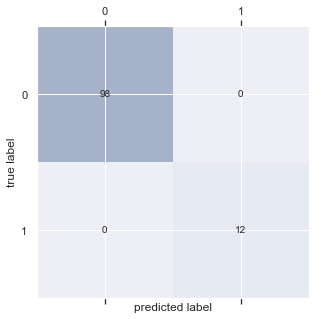

In [54]:
#Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["No rain", "rain"]))

              precision    recall  f1-score   support

     No rain       1.00      0.97      0.98        98
        rain       0.80      1.00      0.89        12

   micro avg       0.97      0.97      0.97       110
   macro avg       0.90      0.98      0.94       110
weighted avg       0.98      0.97      0.97       110



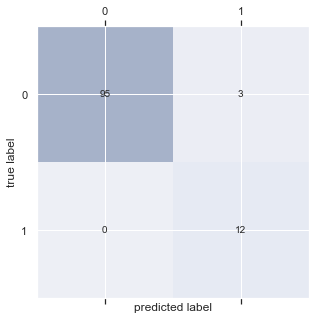

In [55]:
# Support Vector Machine Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["No rain", "rain"]))

# Conclusion

After applying Machine Learning Models, Cross Validation, Nested-cross Validation and Confusion Matrix, Random Forest and Support Vector Machine Models  are suitable for the given Weather Data.

SVM(Support Vector Machine) maximizes the "margin" and relies on the concept of "distance" between different points. And  also SVM perform better on linear dependencies.

Whereas  Random Forest works well with numerical and categorical features. When features are on the various scales.

Will conitues using SVM(Support Vector Machine) Model for new Wheather data to Pridict "Rain Tomorrow"